# Import the custom EDA functions

In [1]:
import pandas as pd
import sys
import os
import logging
print(os.getcwd())
os.chdir(r'c:\Users\habteyes.asfaw\10Accadamy\Rossmann-Sales-Prediction'
)
import src.eda_plots as eda

from src.logger import get_logger




c:\Users\habteyes.asfaw\10Accadamy\Rossmann-Sales-Prediction\notebooks


2024-09-20 11:48:30,348 - INFO - Logger initialized and ready to record.
2024-09-20 11:48:30,348 - INFO - Starting the exploratory data analysis...


In [2]:
logging.info("Loading train_data, test_data, store_data, and sample_submission_data.")

2024-09-20 11:48:30,369 - INFO - Loading train_data, test_data, store_data, and sample_submission_data.


In [3]:
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
# os.chdir(r'c:\Users\habteyes.asfaw\10Accadamy\Rossmann-Sales-Prediction'
# )
from src.data_cleaning import clean_data
from src.eda_plots import (
    compare_promo_distribution, 
    sales_behavior_during_holidays, 
    plot_seasonal_behavior, 
    sales_customers_correlation, 
    promo_effect_on_sales, 
    promo_effectiveness_by_store, 
    customer_behavior_opening_closing, 
    sales_weekend_vs_weekday, 
    assortment_type_sales, 
    competitor_distance_effect, 
    new_competitor_effect
)



# Set up logging


In [4]:

logger = logging.getLogger()

# Load the data


In [5]:

sample_df = pd.read_csv('data/sample_submission.csv')
test_df = pd.read_csv('data/test.csv')
store_df = pd.read_csv('data/store.csv')
train_df = pd.read_csv('data/train.csv')




C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_20280\2098446915.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('data/train.csv')


# Clean data


In [6]:
# Clean the data by calling the function
train_df_clean, test_df_clean = clean_data(train_df, test_df, store_df)


2024-09-20 11:48:30,904 - INFO - Starting data cleaning process...
2024-09-20 11:48:31,080 - INFO - Handling missing values...
2024-09-20 11:48:31,280 - INFO - Converting date columns...
2024-09-20 11:48:31,343 - INFO - Removing duplicates...
2024-09-20 11:48:32,061 - INFO - Handling outliers...
2024-09-20 11:48:32,109 - INFO - Data cleaning completed successfully.


In [7]:
# Display cleaned data for verification
train_df_clean.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822.0,559.0,1,1,0,1,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [8]:
test_df_clean.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,40.0,2013.0,"Jan,Apr,Jul,Oct"
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,40.0,2013.0,"Jan,Apr,Jul,Oct"
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,40.0,2013.0,"Jan,Apr,Jul,Oct"
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,40.0,2013.0,"Jan,Apr,Jul,Oct"


# 1. Promotion Distribution Analysis


2024-09-20 11:48:32,147 - INFO - Starting promotion distribution analysis...
2024-09-20 11:48:32,147 - INFO - Comparing promo distribution between train and test sets.


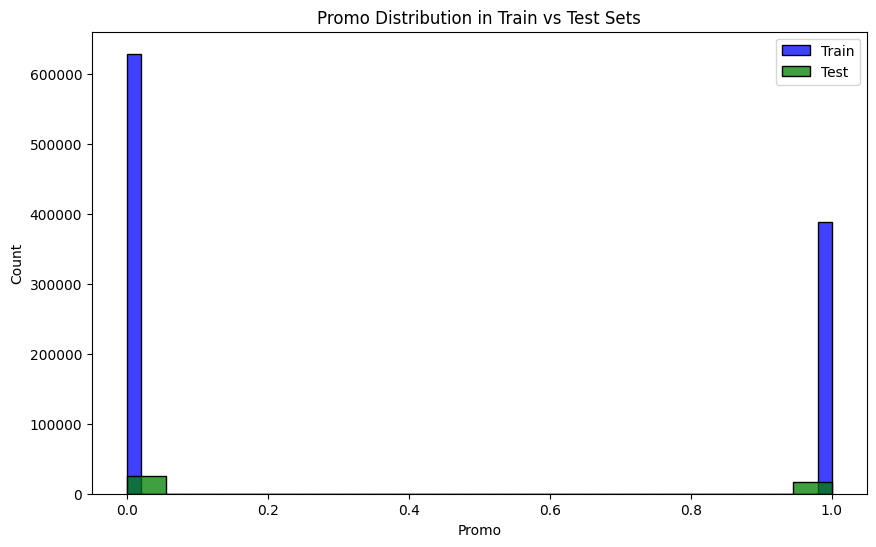

In [9]:
logger.info("Starting promotion distribution analysis...")
eda.compare_promo_distribution(train_df, test_df)

# 2 Sales Behavior During Holidays


2024-09-20 11:48:32,930 - INFO - Analyzing sales during holidays...
2024-09-20 11:48:32,930 - INFO - Analyzing sales behavior during holidays.


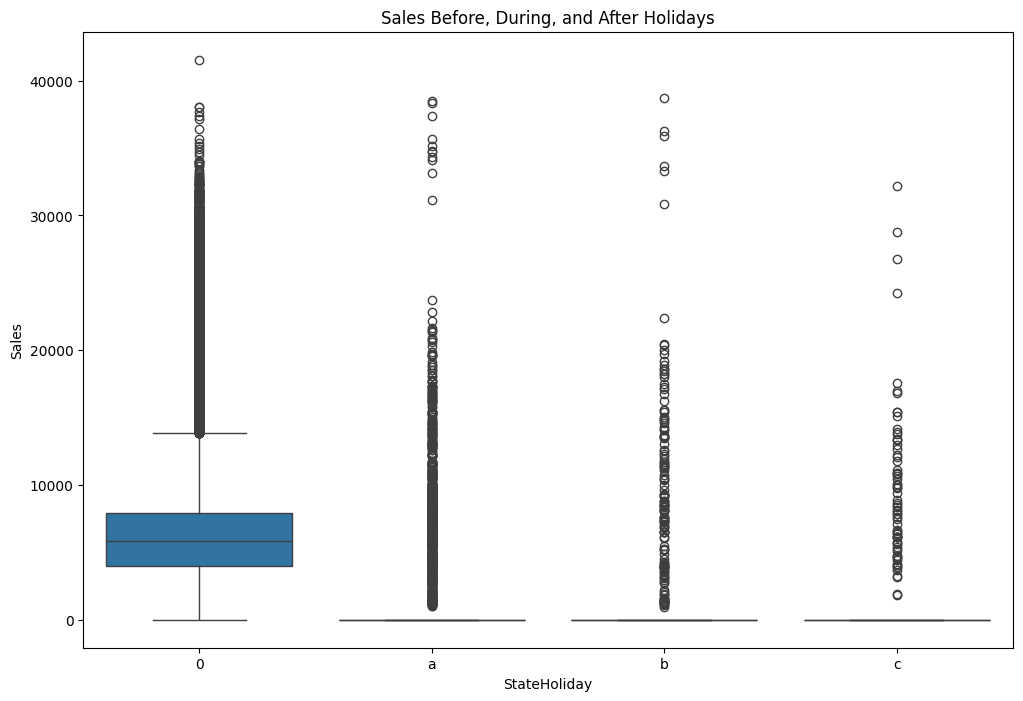

In [10]:
logger.info("Analyzing sales during holidays...")
eda.sales_behavior_during_holidays(train_df)